In [86]:
import pandas as pd
import numpy as np

In [87]:
df=pd.read_csv("Automobile_data.csv")

In [88]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [89]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [90]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [91]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [92]:
df.shape

(205, 26)

In [93]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

*In normalized-losses column, there is a "?" sign, but it is not idenified as missing. So, 
*this part will be dropped out. First, we identify these marks and clean it. 
*Parts with "?" sign or [front] -duplicates- or "," will be dropped. 

In [94]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
list = missing_data.columns.values.tolist()
print(list)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [96]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print ("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

In [98]:
df.replace("?", np.nan, inplace = True)

In [99]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [100]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front[front],88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front?,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front?,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,"front,",99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,"front,front",99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [101]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [102]:
to_drop = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df.drop(to_drop, inplace = True, axis = 1)
df.head()

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg
0,3,alfa-romero,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
1,3,alfa-romero,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
2,1,alfa-romero,gas,std,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,19,26
3,2,audi,gas,std,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,24,30
4,2,audi,gas,std,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,18,22


In [103]:
df.set_index('symboling', inplace = True)
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg
symboling,,,,,,,,,,,,,,,,,,
3,alfa-romero,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
3,alfa-romero,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
1,alfa-romero,gas,std,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,19,26
2,audi,gas,std,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,24,30
2,audi,gas,std,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,18,22


In [104]:
df.shape

(205, 18)

In [106]:
df['engine-location'].value_counts()

front              179
front[location]      5
front,               5
font                 4
front[engine]        4
rear[end]            3
front?               2
front,front          1
front,               1
front[front]         1
Name: engine-location, dtype: int64

In [107]:
df.dropna()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg
symboling,,,,,,,,,,,,,,,,,,
3,alfa-romero,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,21,27
3,alfa-romero,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,21,27
1,alfa-romero,gas,std,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.00,19,26
2,audi,gas,std,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.00,24,30
2,audi,gas,std,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.00,18,22
2,audi,gas,std,sedan,fwd,"front,",99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,std,sedan,fwd,"front,",105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,std,wagon,fwd,"front,",105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,turbo,sedan,fwd,"front,",105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,8.30,17,20


In [108]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [109]:
df['engine-location'].value_counts()

front              179
front[location]      5
front,               5
font                 4
front[engine]        4
rear[end]            3
front?               2
front,front          1
front,               1
front[front]         1
Name: engine-location, dtype: int64

In [110]:
df.replace({'engine-location': 'front[engine]'}, {'engine-location': 'front'}, regex=True)

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg
symboling,,,,,,,,,,,,,,,,,,
3,alfa-romero,gas,std,convertible,rwd,front[front],88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,21,27
3,alfa-romero,gas,std,convertible,rwd,front?,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.00,21,27
1,alfa-romero,gas,std,hatchback,rwd,front?,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.00,19,26
2,audi,gas,std,sedan,fwd,"front,",99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.00,24,30
2,audi,gas,std,sedan,4wd,"front,front",99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.00,18,22
2,audi,gas,std,sedan,fwd,"front,",99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,std,sedan,fwd,"front,",105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,std,wagon,fwd,"front,",105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,8.50,19,25
1,audi,gas,turbo,sedan,fwd,"front,",105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,8.30,17,20


In [111]:
marks=[',','?', '[',']']

def clean_engine(item):
    dop= str(item.loc['engine-location'])
    
    if dop == 'nan' or dop[0] == ',' or dop[0]=='?':
        return np.NaN
    
    for character in marks:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

df['engine-location'] = df.apply(clean_engine, axis = 1)

In [112]:
df['engine-location'].value_counts()

front    198
font       4
rear       3
Name: engine-location, dtype: int64

In [113]:
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,city-mpg,highway-mpg
symboling,,,,,,,,,,,,,,,,,,
3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
3,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,21,27
1,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,19,26
2,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,10.0,24,30
2,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,18,22


In [114]:
engn = df['engine-location']
df['engine-location'] = np.where(engn.str.contains('front[location]'), 'front',
    np.where(engn.str.contains('front[engine]'), 'front',
        np.where(engn.eq('front[front]'),
            'front', df['engine-location'])))

In [115]:
df['engine-location'].value_counts()

front    198
font       4
rear       3
Name: engine-location, dtype: int64

In [116]:
marks=[',','?', '[',']']

def clean_engine1(item):
    dop= str(item.loc['engine-location'])
    
    if dop == 'font' or dop[0] == ',' or dop[0]=='?':
        return 'front'
    
    for character in marks:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

df['engine-location'] = df.apply(clean_engine1, axis = 1)

In [117]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

*In the first cleaning, we removed brackets, commas, and other marks. However, there is a mispelling "font". Thus, the other *cleaning was done to convert "font" to "front"

*Below is the third task: transforming the data.
*Transforming the data is needed to bring all data (or certain variables of interest) into the same scale, so the relationship can be examined properly. For example, we chose city-mpg and highway-mpg to plot (using histogram, which is helpful to see the spread of the data) and then explain why transformation is needed.


In [118]:
df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [119]:
import matplotlib.pyplot as plt

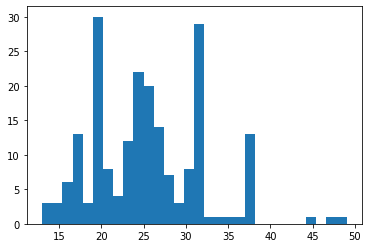

In [120]:
plt.hist(df['city-mpg'], bins=30)
plt.show()

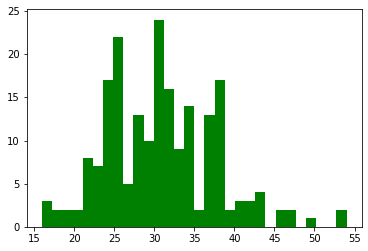

In [121]:
plt.hist(df['highway-mpg'], bins=30, facecolor='g')
plt.show()

*You can notice that there is no large variation between city-mpg and highway-mpg, but highway-mpg has larger values. Let's see how both look like in the below histogram.

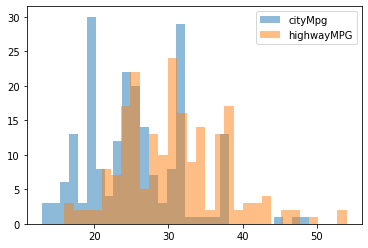

In [122]:
cityMpg = [df['city-mpg']]
highwayMPG = [df['highway-mpg']]

plt.hist(cityMpg, alpha=0.5, label='cityMpg', bins=30)
plt.hist(highwayMPG, alpha=0.5, label='highwayMPG', bins=30)
plt.legend(loc='upper right')
plt.show()

*So, for analysis purposes, both variables will be standardized (scaled) between zero and one. Two ways of transformation are used for comparison purposes. 

In [123]:
# 1st: (Min - max normalization)-city-mpg
df["city-mpg"] = (df["city-mpg"] - df["city-mpg"].min())/(df["city-mpg"].max() - df["city-mpg"].min())

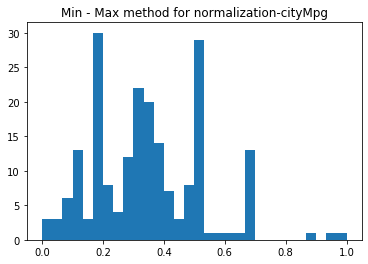

In [124]:
plt.hist(df["city-mpg"], bins=30)
plt.title("Min - Max method for normalization-cityMpg")
plt.show()

In [125]:
# 1st: (Min - max normalization)-highway-mpg
df["highway-mpg"] = (df["highway-mpg"] - df["highway-mpg"].min())/(df["highway-mpg"].max() - df["highway-mpg"].min())


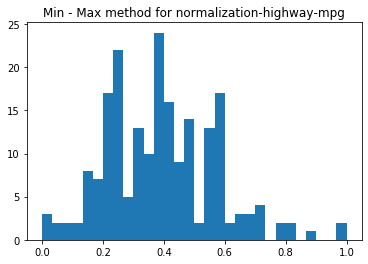

In [126]:
plt.hist(df["highway-mpg"], bins=30)
plt.title("Min - Max method for normalization-highway-mpg")
plt.show()

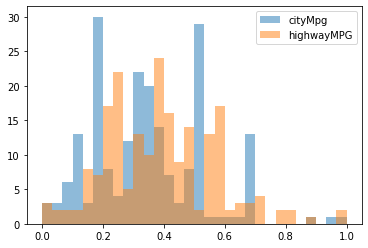

In [127]:
cityMpg = [df['city-mpg']]
highwayMPG = [df['highway-mpg']]

plt.hist(cityMpg, alpha=0.5, label='cityMpg', bins=30)
plt.hist(highwayMPG, alpha=0.5, label='highwayMPG', bins=30)
plt.legend(loc='upper right')
plt.show()

In [128]:
from sklearn import preprocessing

In [129]:
names = df.columns
names

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [149]:
scaler = preprocessing.StandardScaler()

In [150]:
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=names)
df.head()

ValueError: could not convert string to float: 'alfa-romero'

In [151]:
df.dtypes

make                  object
fuel-type             object
aspiration            object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
compression-ratio    float64
city-mpg             float64
highway-mpg          float64
dtype: object

In [152]:
M = "make"
type(M)

str

In [158]:
F = float(M)
print

ValueError: could not convert string to float: 'make'

In [159]:
#There is error occuring due to the data type
df['make'] = df.make.astype(float)

ValueError: could not convert string to float: 'alfa-romero'

In [147]:
df.dtypes

make                  object
fuel-type             object
aspiration            object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
compression-ratio    float64
city-mpg             float64
highway-mpg          float64
dtype: object

In [145]:
#There is error occuring due to the data type
df.make.str.replace('-', '').astype(float)

ValueError: could not convert string to float: 'alfaromero'

In [160]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

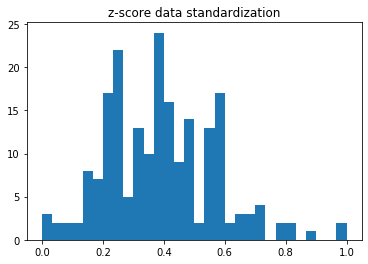

In [176]:
# Here is another way of transformation (z-score standarsization).
df[['highway-mpg', 'city-mpg']]
    
plt.hist(df["highway-mpg"], bins=30)
plt.title("z-score data standardization")
plt.show()

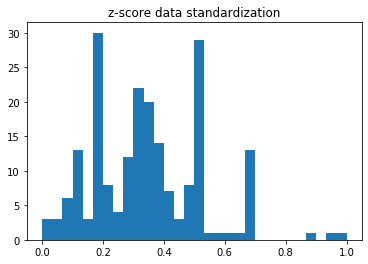

In [177]:
# Here is anoth way of normalization.

df[['highway-mpg', 'city-mpg']]
    
plt.hist(df["city-mpg"], bins=30)
plt.title("z-score data standardization")
plt.show()

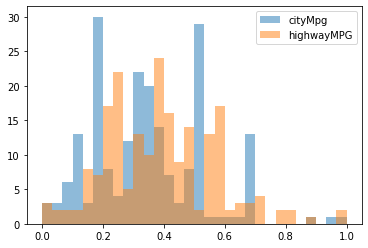

In [178]:
cityMpg = [df['city-mpg']]
highwayMPG = [df['highway-mpg']]

plt.hist(cityMpg, alpha=0.5, label='cityMpg', bins=30)
plt.hist(highwayMPG, alpha=0.5, label='highwayMPG', bins=30)
plt.legend(loc='upper right')
plt.show()

*To conclude, histogram was helpful to view the two variables -before and after transformation-. We used two types of transformation (min-max normalization and z-score standardization), and both were effective ways to show similar overlapping distributions. This might be, as mentioned earlier, relevant to how close the values of the two variables (city-mpg and highway-mpg). 